In [75]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [76]:
mar=pd.read_csv("C:\\Users\\kumar\\Python Assign\\logistic regression\\logistic regression\\Data sets for practice\\Affairspy.csv")
mar.drop(["Unnamed: 0"],inplace=True,axis = 1)

In [77]:
mar

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3
5,0,female,32.0,1.50,no,2,17,5,5
6,0,female,22.0,0.75,no,2,12,1,3
7,0,male,57.0,15.00,yes,2,14,4,4
8,0,female,32.0,15.00,yes,4,16,1,2
9,0,male,22.0,1.50,no,4,14,4,5


In [78]:
x=mar.iloc[:,1:9]
y=mar.iloc[:,:1]

In [79]:
mar.isnull().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

##### THERE ARE NO NULL VALUES. 

In [80]:
mar.shape

(601, 9)

In [81]:
mar.dropna().shape # to drop null values


(601, 9)

--> Fill nan values with mode of the categorical column or discrete data


--> If you have comtinous data replace with mean

In [82]:
mar.describe()

,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


In [83]:
mar.mode()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,female,27.0,15.0,yes,4,14,5,5


In [84]:
mar["education"].fillna(16.166389,inplace=True)  # since mean 
mar["affairs"].fillna(0,inplace=True)  # since mode 
mar["age"].fillna(32.487521,inplace=True)  # since mean 
mar["yearsmarried"].fillna(8.177696,inplace=True)  # since mean 
mar["religiousness"].fillna(4,inplace=True)  # since mode
mar["occupation"].fillna(5,inplace=True)  # since mode
mar["rating"].fillna(5,inplace=True)  # since mode
mar["gender"].fillna('female',inplace=True)  # since mode 
mar["children"].fillna('yes',inplace=True)  # since mode 

##### CONVERTING CATEGORICAL DATA  (DUMMY VARIABLES CREATION)

In [85]:
dummy=pd.get_dummies(x['gender'])
dummy1=pd.get_dummies(x['children'])
x=pd.concat([x,dummy,dummy1],axis=1)
x.drop(['children','gender'],inplace=True,axis = 1)

#### MODEL BUILDING USING CLASSIFIER FROM SKLEARN

In [109]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
classifier.coef_ # coefficients of features 


array([[ 0.04005619, -0.09144573,  0.30859245, -0.03980738, -0.02789911,
         0.45044424, -0.18459114, -0.41496346, -0.10670449, -0.49285012],
       [-0.01455329, -0.08197711,  0.1131199 , -0.08023419, -0.12380206,
        -0.03455068, -0.44906144,  0.2465723 , -0.52413465,  0.32164552],
       [-0.09225343,  0.19316758, -0.46139058,  0.0267784 ,  0.18199253,
        -0.27906954, -0.46845799, -0.17102013, -0.49871817, -0.14075995],
       [-0.03585794,  0.04525574, -0.10853475, -0.04555366, -0.02479725,
        -0.48119886, -0.26599331,  0.37047144, -0.02192114,  0.12639928],
       [-0.04012203,  0.08865867, -0.3775875 ,  0.15539358,  0.0047777 ,
        -0.40389273, -0.41984623, -0.62993239, -0.69026788, -0.35951074],
       [-0.04141226,  0.1955055 , -0.49618974, -0.09506351,  0.17103929,
        -0.54465125,  0.23507322,  0.28772127,  0.45815839,  0.06463611]])

WE GOT 6 ROWS OF COEFFICIENTS AS OUR PREDICTING VARIABLES HAS 6 CATEGORIES(I.E NUMBER OF AFFAIRS -0,1,2,3,7,12)
IF TWO CATEGORIES EXISTED THEN WE GET ONLY 1 ROW .. IT IS TO BE NOTED

In [111]:
classifier.intercept_


array([-0.59955461, -0.20248914, -0.63947812,  0.10447814, -1.04977862,
        0.52279449])

In [112]:
predictions= classifier.predict(x)


In [113]:
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [114]:
predictions=pd.DataFrame(predictions)

#### GETTING PROBABILITIES OF EXTRA MARITAL AFFAIRS

In [115]:
prob_x=classifier.predict_proba (x) # Probability values 


In [116]:
prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))

In [117]:
prob

,0,1,2,3,4,5
0,0.794437,0.019294,0.028868,0.025444,0.053885,0.078071
1,0.896336,0.030885,0.008021,0.016082,0.021709,0.026966
2,0.514591,0.038289,0.078123,0.039347,0.119022,0.210627
3,0.927197,0.030222,0.004399,0.009355,0.016972,0.011855
4,0.712923,0.056443,0.032992,0.054354,0.079258,0.064030
5,0.916280,0.024454,0.005408,0.008352,0.031918,0.013589
6,0.792981,0.073744,0.008522,0.039951,0.043842,0.040960
7,0.788813,0.039712,0.014615,0.026476,0.041726,0.088659
8,0.544103,0.046811,0.044750,0.068028,0.172334,0.123974
9,0.866856,0.088888,0.005237,0.019731,0.010826,0.008461


##### WE GOT PROBABILITIES 6 COLUMNS 

In [118]:
# because affairs have 0,1,2,3,7,12 values 
#and for interpretation consider 1st row 
#probabaility of having 0 affairs is 0.794437
#probability of having 1 affair is 0.019294
#probability of having 2 affairs is 0.028868
#probability of having 3 affairs is 0.025444
#probability of having 7 affairs is 0.053885
#probability of having 12 affairs is 0.078071"""

In [119]:
new_df = pd.concat([mar,prob],axis=1)


In [120]:
new_df

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,0,1,2,3,4,5
0,0,male,37.0,10.00,no,3,18,7,4,0.794437,0.019294,0.028868,0.025444,0.053885,0.078071
1,0,female,27.0,4.00,no,4,14,6,4,0.896336,0.030885,0.008021,0.016082,0.021709,0.026966
2,0,female,32.0,15.00,yes,1,12,1,4,0.514591,0.038289,0.078123,0.039347,0.119022,0.210627
3,0,male,57.0,15.00,yes,5,18,6,5,0.927197,0.030222,0.004399,0.009355,0.016972,0.011855
4,0,male,22.0,0.75,no,2,17,6,3,0.712923,0.056443,0.032992,0.054354,0.079258,0.064030
5,0,female,32.0,1.50,no,2,17,5,5,0.916280,0.024454,0.005408,0.008352,0.031918,0.013589
6,0,female,22.0,0.75,no,2,12,1,3,0.792981,0.073744,0.008522,0.039951,0.043842,0.040960
7,0,male,57.0,15.00,yes,2,14,4,4,0.788813,0.039712,0.014615,0.026476,0.041726,0.088659
8,0,female,32.0,15.00,yes,4,16,1,2,0.544103,0.046811,0.044750,0.068028,0.172334,0.123974
9,0,male,22.0,1.50,no,4,14,4,5,0.866856,0.088888,0.005237,0.019731,0.010826,0.008461


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,predictions)
print (confusion_matrix)
accuracy=(sum(np.diagonal(confusion_matrix))/np.sum(confusion_matrix))*100


[[448   0   0   0   0   3]
 [ 34   0   0   0   0   0]
 [ 17   0   0   0   0   0]
 [ 18   0   0   0   0   1]
 [ 42   0   0   0   0   0]
 [ 35   0   0   0   0   3]]


In [122]:
print("accuracy is",accuracy)

accuracy is 75.04159733777038


### MODEL BULDING USING TRAIN TEST SPLIT

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)


In [124]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [125]:
y_pred = logisticRegr.predict(x_test)


In [126]:
y_pred=pd.DataFrame(y_pred)

In [127]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       120
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         8
          12       1.00      0.25      0.40         8

   micro avg       0.81      0.81      0.81       151
   macro avg       0.30      0.21      0.22       151
weighted avg       0.69      0.81      0.73       151



C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ACCURACY FINDING USINNG CONFUSION MATRXI

In [128]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)
accuracy1=(sum(np.diagonal(confusion_matrix))/np.sum(confusion_matrix))*100

[[120   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  7   0   0   0   0   0]
 [  5   0   0   0   0   0]
 [  8   0   0   0   0   0]
 [  6   0   0   0   0   2]]


In [129]:
print("accuracy is",accuracy1)

accuracy is 80.79470198675497


In [130]:
accuracy2=logisticRegr .score(x_test,y_test)
print(accuracy2)

0.8079470198675497


In [131]:
print(metrics.accuracy_score(y_test, y_pred))

0.8079470198675497


In [35]:
#logreg.score(Xtest, Ytest) is equivalent to your print(classificationreport(Ytest, Ypred)). 
#But you do not need to calculate Ypred; that is done internally by the library"""

##### GETTING PROBABILITIES

In [36]:
predict_proba=logisticRegr.predict_proba(x_test)
y_prob = pd.DataFrame(logisticRegr .predict_proba(x.iloc[:,:]))

In [37]:
predict_proba=pd.DataFrame(predict_proba)
y_pred=pd.DataFrame(y_pred)

y_pred = y_pred.rename(columns={0: "affairs"})



Text(0, 0.5, 'Frequency')

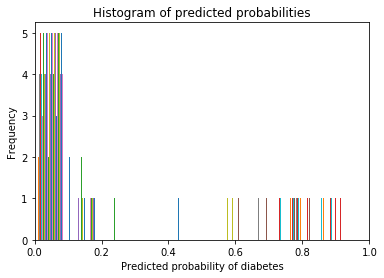

In [69]:
plt.hist(predict_proba)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

CREATING A DATAFRAME OF PREDICTIONS AND PROBABILITIES

In [38]:
final=pd.concat([y_pred,predict_proba],axis=1)

In [39]:
final.shape

(151, 7)

In [40]:
final

,affairs,0,1,2,3,4,5
0,12,0.187895,0.017538,0.119689,0.073491,0.233486,0.367901
1,0,0.275759,0.062094,0.098659,0.086670,0.273738,0.203080
2,0,0.497706,0.019153,0.071000,0.038278,0.171669,0.202194
3,0,0.615171,0.109117,0.019417,0.061125,0.085653,0.109518
4,0,0.744726,0.049335,0.018836,0.030815,0.090803,0.065486
5,0,0.904366,0.051089,0.005260,0.011668,0.019657,0.007959
6,0,0.881672,0.044069,0.017450,0.006897,0.033232,0.016680
7,0,0.725013,0.061877,0.006499,0.043806,0.109634,0.053171
8,0,0.609028,0.039381,0.013932,0.076750,0.171531,0.089377
9,0,0.844493,0.096712,0.006478,0.012833,0.028053,0.011431


### ROC CURVE AND AUC(Area Under Curve)

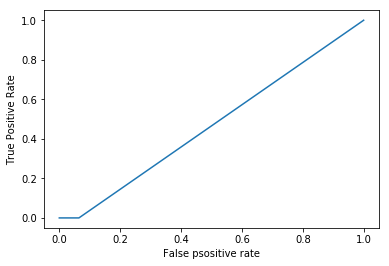

AUC: 0.467741935483871


In [54]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
# Print ROC curve
plt.plot(fpr,tpr)
plt.xlabel("False psositive rate")
plt.ylabel("True Positive Rate")
plt.show() 
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)